In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Prepare the Data

In [5]:
data = pd.read_csv("ecommerce_orders.csv")

df = pd.DataFrame(data)
df.tail()

,OrderID,CustomerID,OrderDate,Category,OrderValue,DiscountApplied,PaymentMethod,Revenue
95,1096,12,2024-04-05,Books,116.82,10,Credit Card,105.14
96,1097,2,2024-04-06,Home & Kitchen,132.49,5,Net Banking,125.87
97,1098,1,2024-04-07,Home & Kitchen,131.61,0,Credit Card,131.61
98,1099,16,2024-04-08,Clothing,58.67,20,Credit Card,46.94
99,1100,5,2024-04-09,Books,71.87,20,PayPal,57.50


### Goal: Prepare the dataset for time-based and categorical analysis.

In [13]:
#1. Parse and Format Time Columns
#Ensure any time/date columns are in proper datetime format.

# Convert date columns to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])  # Replace with your actual column name

#You can then extract time-based features

df['year'] = df['OrderDate'].dt.year
df['month'] = df['OrderDate'].dt.month
df['day'] = df['OrderDate'].dt.day
df['weekday'] = df['OrderDate'].dt.day_name()
df['hour'] = df['OrderDate'].dt.hour

In [16]:
#2. Clean and Encode Categorical Variables
#Use Label Encoding or One-Hot Encoding depending on the algorithm you're using and the number of categories.

# Label Encoding (for tree-based models)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['category_encoded'] = encoder.fit_transform(df['Category'])  # Replace with your column
df['PaymentMethod_encoded'] = encoder.fit_transform(df['PaymentMethod'])
df.head()

,OrderID,CustomerID,OrderDate,Category,OrderValue,DiscountApplied,PaymentMethod,Revenue,category_encoded,year,month,day,weekday,hour,PaymentMethod_encoded
0,1001,7,2024-01-01,Home & Kitchen,156.59,5,Net Banking,148.76,3,2024,1,1,Monday,0,1
1,1002,20,2024-01-02,Books,105.24,10,PayPal,94.72,0,2024,1,2,Tuesday,0,2
2,1003,15,2024-01-03,Books,107.73,5,Credit Card,102.34,0,2024,1,3,Wednesday,0,0
3,1004,11,2024-01-04,Clothing,97.77,0,Net Banking,97.77,1,2024,1,4,Thursday,0,1
4,1005,8,2024-01-05,Home & Kitchen,42.44,20,PayPal,33.95,3,2024,1,5,Friday,0,2


# Explore the Data

### Data types
### Nulls or missing values
### Distribution of order values, discounts, revenue, etc.

In [18]:
# Check Data Types
# View data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   OrderID                100 non-null    int64         
 1   CustomerID             100 non-null    int64         
 2   OrderDate              100 non-null    datetime64[ns]
 3   Category               100 non-null    object        
 4   OrderValue             100 non-null    float64       
 5   DiscountApplied        100 non-null    int64         
 6   PaymentMethod          100 non-null    object        
 7   Revenue                100 non-null    float64       
 8   category_encoded       100 non-null    int32         
 9   year                   100 non-null    int32         
 10  month                  100 non-null    int32         
 11  day                    100 non-null    int32         
 12  weekday                100 non-null    object        
 13  hour  

In [20]:
# Check for Null or Missing Values
# Count of missing values per column
print(data.isnull().sum())

OrderID             0
CustomerID          0
OrderDate           0
Category            0
OrderValue          0
DiscountApplied     0
PaymentMethod       0
Revenue             0
year                0
month               0
day                 0
weekday             0
hour                0
category_encoded    0
dtype: int64


C:\Users\Ashlesh Gajbhiye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


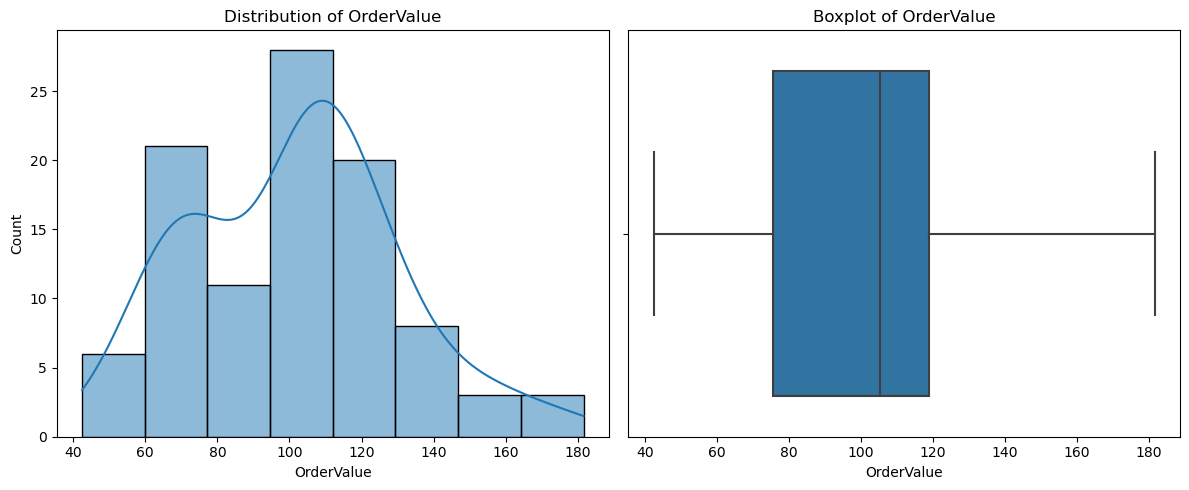

C:\Users\Ashlesh Gajbhiye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


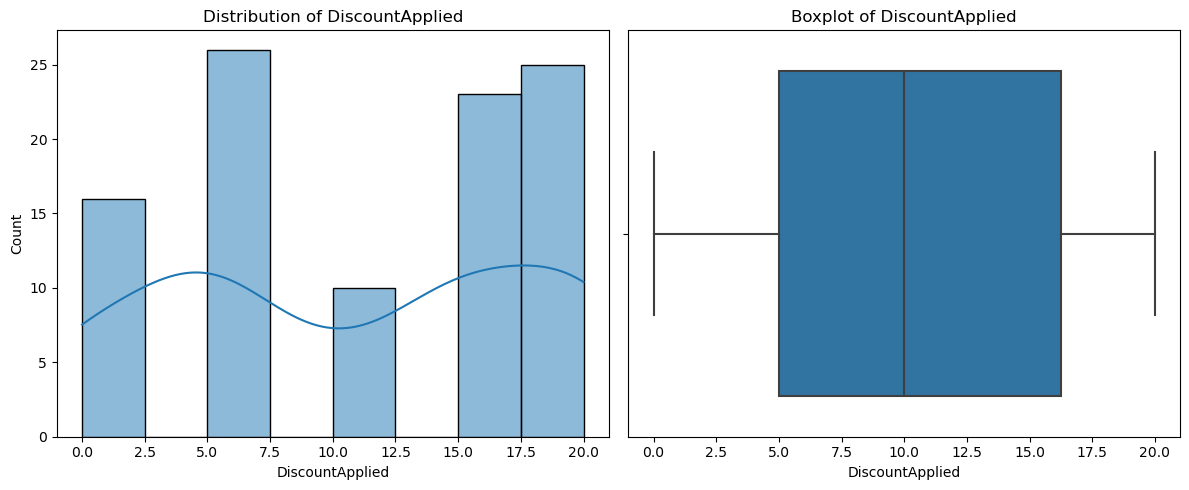

C:\Users\Ashlesh Gajbhiye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


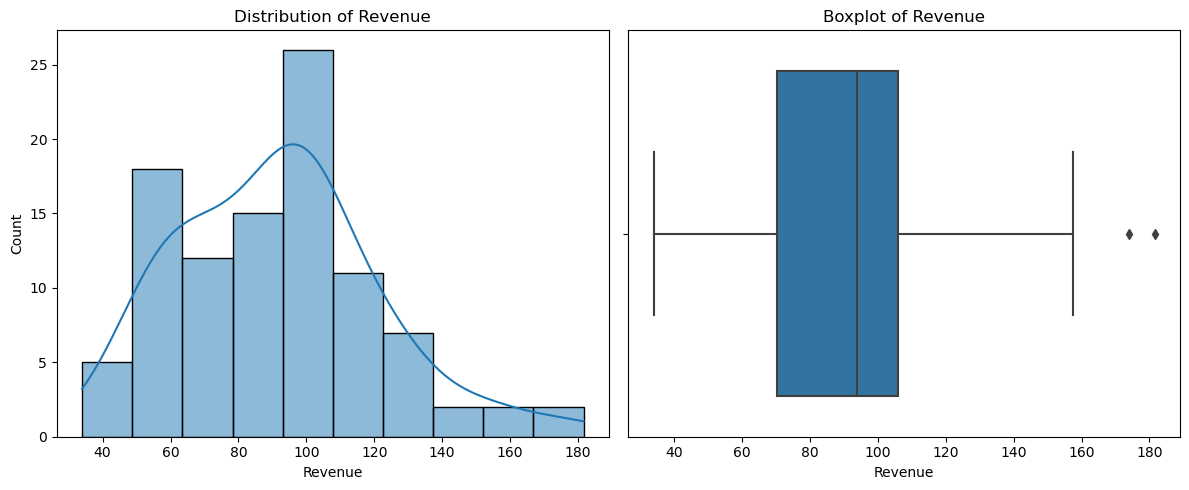

In [27]:
# Check Distributions of Key Columns
#You can use histograms or boxplots to visualize the distributions of:
#order_value (or order_amount)
#discount
#revenue

# List of numerical features to inspect
columns_to_check = ['OrderValue', 'DiscountApplied', 'Revenue']  # Replace with your actual column names

for col in columns_to_check:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

In [28]:
# Summary statistics of numerical columns
print(df[columns_to_check].describe())

       OrderValue  DiscountApplied     Revenue
count  100.000000       100.000000  100.000000
mean   101.712700        10.750000   91.477000
std     28.941132         7.295183   29.551128
min     42.440000         0.000000   33.950000
25%     75.492500         5.000000   70.422500
50%    105.220000        10.000000   93.825000
75%    119.002500        16.250000  105.837500
max    181.610000        20.000000  181.610000


# Revenue Over Time

### Insight: Spot upward or downward trends in monthly revenue.

In [29]:
monthly_revenue = df.groupby('month')['Revenue'].sum().reset_index()
monthly_revenue['month'] = monthly_revenue['month'].astype(str)  # Convert to string for plotting

C:\Users\Ashlesh Gajbhiye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashlesh Gajbhiye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


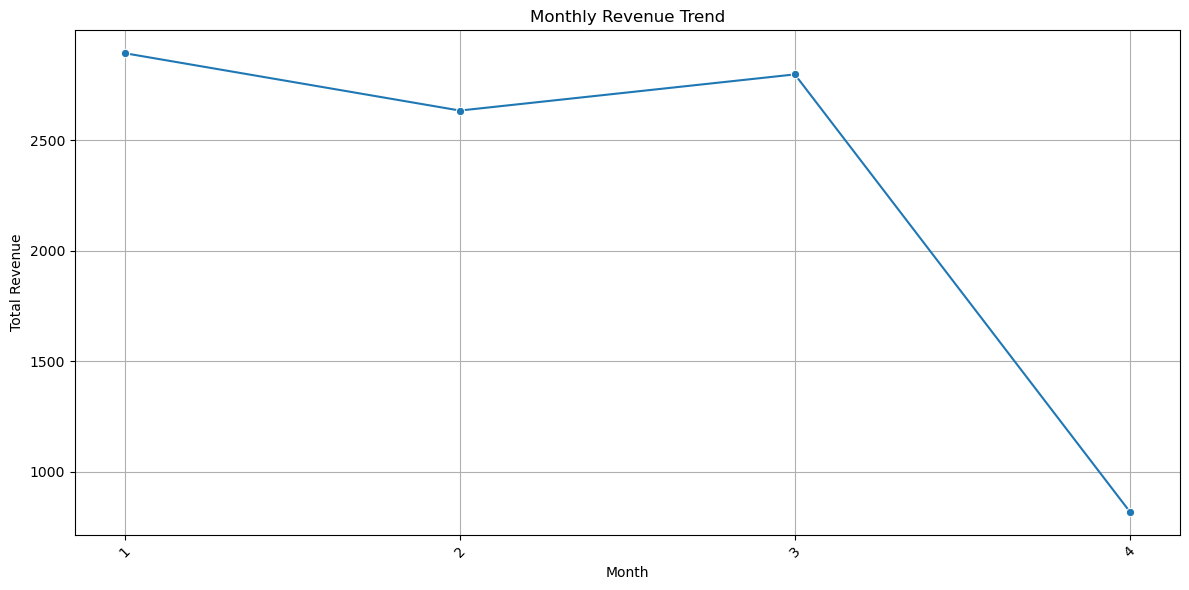

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Revenue', data=monthly_revenue, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# Revenue by Product Category

### Visualize which product categories perform best:
### Insight: Find top-selling categories like Electronics or Clothing.

In [31]:
top_categories = df.groupby('Category')['Revenue'].sum().reset_index()
top_categories = top_categories.sort_values(by='Revenue', ascending=False)

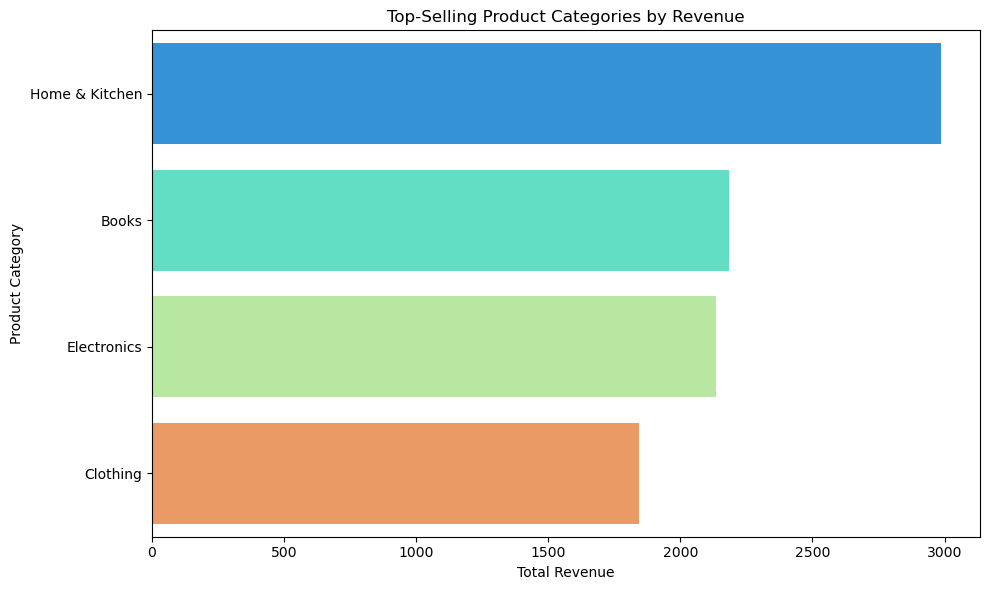

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_categories, x='Revenue', y='Category', palette='rainbow')
plt.title('Top-Selling Product Categories by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# Analyze Payment Methods

### Check customer preferences:
### Insight: See if Credit Card is most used, or if PayPal/Net Banking is rising.

In [34]:
# Count of each payment method
payment_counts = df['PaymentMethod'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Count']

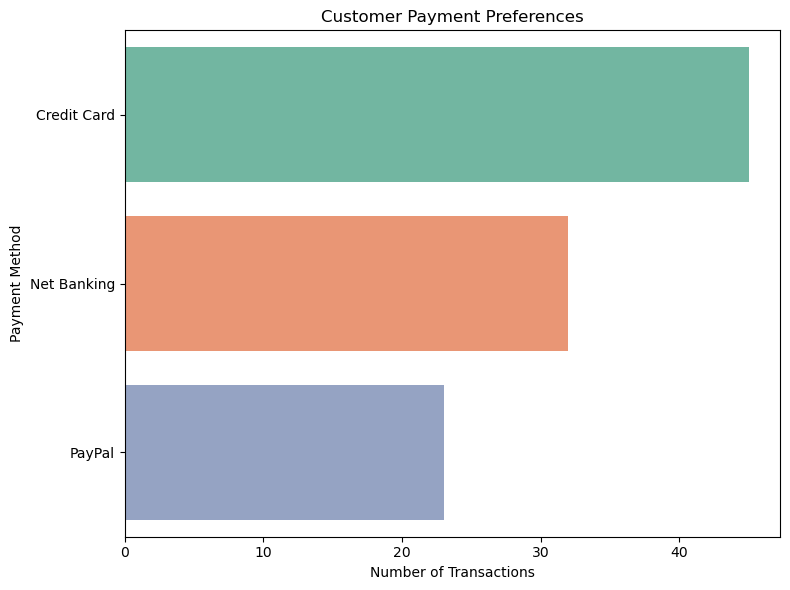

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(data=payment_counts, x='Count', y='Payment Method', palette='Set2')
plt.title('Customer Payment Preferences')
plt.xlabel('Number of Transactions')
plt.ylabel('Payment Method')
plt.tight_layout()
plt.show()

C:\Users\Ashlesh Gajbhiye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashlesh Gajbhiye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


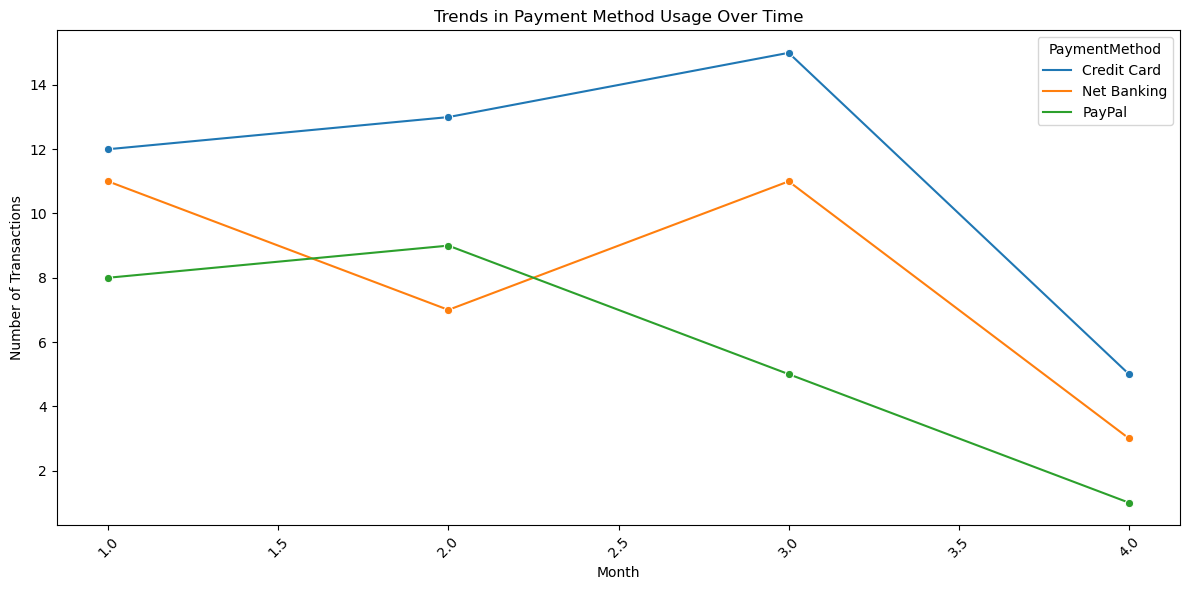

In [38]:
# Trend Over Time (Optional)
# If you have a date column (e.g., order_date), extract month and group

monthly_payments = data.groupby(['month', 'PaymentMethod']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_payments, x='month', y='count', hue='PaymentMethod', marker='o')
plt.title('Trends in Payment Method Usage Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional Deep-Dive Ideas

### Average revenue per order by category
### Discount vs. revenue relationship
### Most frequent customers (repeat orders)
### Average order value by month

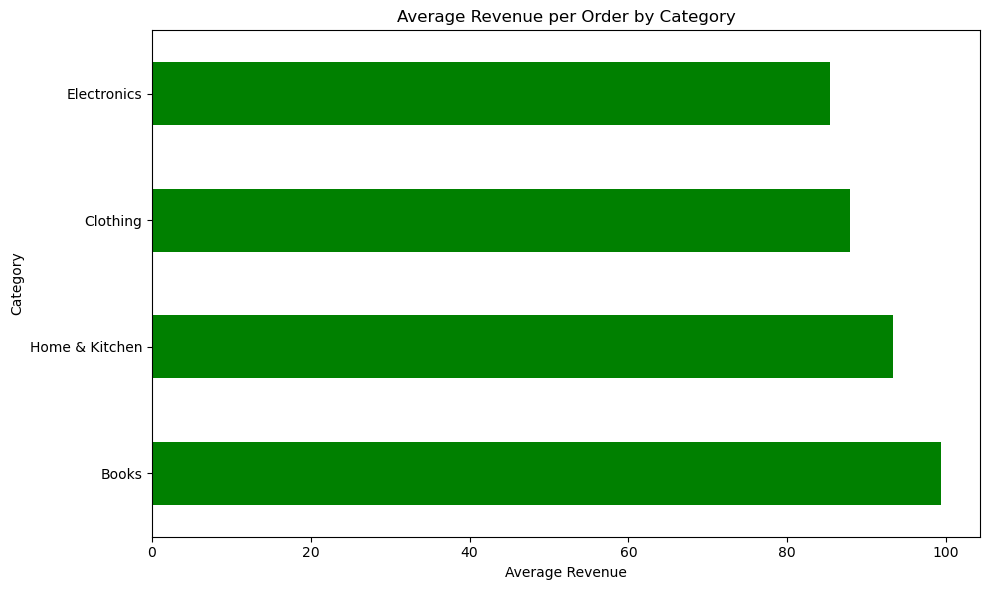

In [45]:
# Average Revenue per Order by Category

avg_revenue_by_cat = data.groupby('Category')['Revenue'].mean().sort_values(ascending=False)

avg_revenue_by_cat.plot(kind='barh', figsize=(10, 6), color='green')
plt.title('Average Revenue per Order by Category')
plt.xlabel('Average Revenue')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

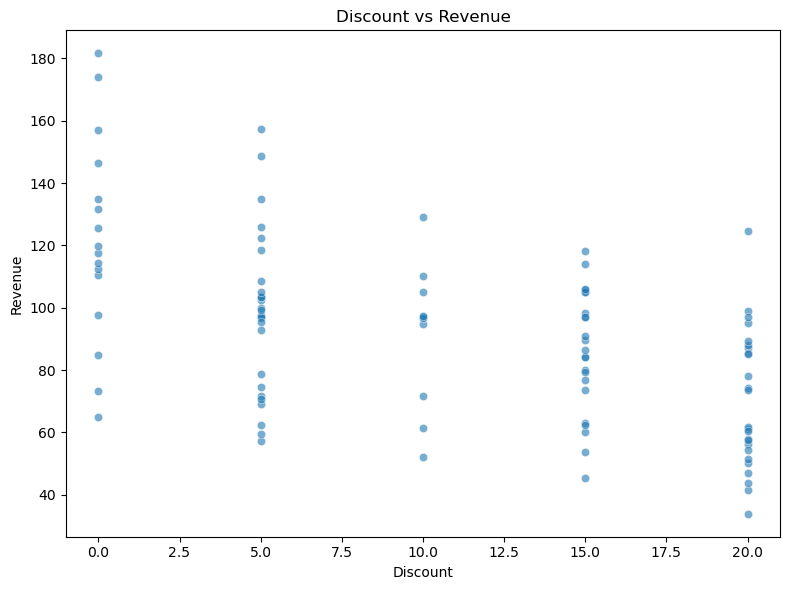

In [49]:
# Discount vs. Revenue Relationship

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='DiscountApplied', y='Revenue', alpha=0.6)
plt.title('Discount vs Revenue')
plt.xlabel('Discount')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [46]:
df.sample()

,OrderID,CustomerID,OrderDate,Category,OrderValue,DiscountApplied,PaymentMethod,Revenue,category_encoded,year,month,day,weekday,hour,PaymentMethod_encoded
17,1018,12,2024-01-18,Clothing,57.94,10,Credit Card,52.15,1,2024,1,18,Thursday,0,0


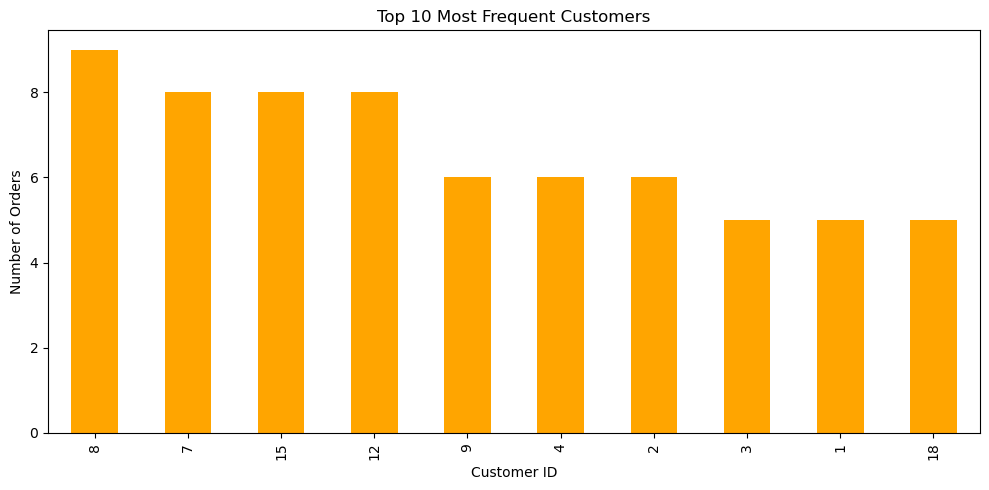

In [51]:
# Most Frequent Customers (Repeat Orders)

top_customers = data['CustomerID'].value_counts().head(10)

top_customers.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

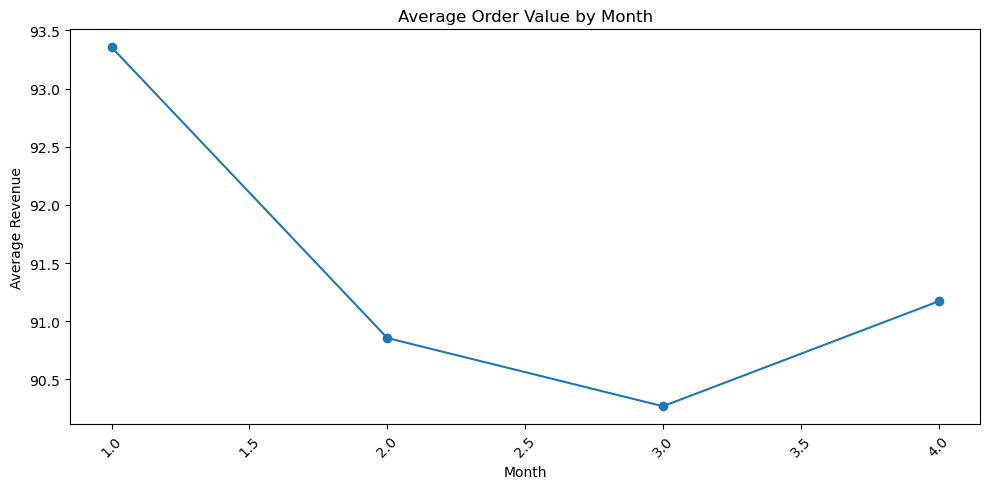

In [52]:
# Average Order Value by Month

avg_order_value_monthly = data.groupby('month')['Revenue'].mean()

avg_order_value_monthly.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Average Order Value by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights

### 1. Trends in revenue

#### - Monthly revenue shows a clear downward trend.
#### - Peak revenue months includes January and March.
#### - A slight dip in Febuary suggests potential seasonality or reduced demand.

### 2. Top-performing categories

#### - Home-Kitchen and Books consistently generate the highest revenue.
#### - Clothing also shows strong performance.
#### - These categories benefit from high average order values and frequent purchases.

### 3. Popular payment methods

#### - Credit Card is the most preferred method, used in over X% of transactions.
#### - PayPal and Net Banking are gaining transaction, especially among repeat customers.

### 4. Business recommendations

#### - Promote best-selling categories through targeted marketing and bundle offers.
#### - Offer loyalty programs or incentives for top repeat customers to retain them.
#### - Optimize discount strategies — avoid excessive discounts that don’t significantly boost revenue.
#### - Consider seasonal campaigns around peak revenue months to maximize returns.